In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = pd.read_csv('NEWcleanedDATA.csv')

In [2]:
df.head()

,Unnamed: 0,objid,ra,dec,u,g,r,i,z,run,...,camcol,field,specobjid,class,redshift,redshift_err,plate,mjd,fiberid,class1
0,0,1.240000e+18,199.939440,32.875467,18.27449,17.01069,16.39594,16.05050,15.79158,4576,...,1,532,2.360000e+18,1,0.036922,0.000011,2093,53818,66,1
1,1,1.240000e+18,225.937814,61.567422,18.51085,17.42787,16.94735,16.61756,16.46231,1412,...,4,290,6.880000e+17,1,0.065836,0.000008,611,52055,472,1
2,2,1.240000e+18,182.372228,43.312479,19.59469,19.39359,19.08492,19.01972,19.14087,3840,...,6,162,1.630000e+18,0,0.960348,0.000361,1450,53120,348,0
3,3,1.240000e+18,201.170118,7.124704,18.86066,17.91374,17.56237,17.26353,17.13068,3230,...,3,24,2.030000e+18,1,0.120267,0.000006,1799,53556,496,1
4,4,1.240000e+18,7.270341,-9.284358,19.46794,18.12656,17.43603,17.04602,16.81404,1740,...,5,70,7.350000e+17,1,0.085830,0.000014,653,52145,614,1


In [3]:
len(df)

47484

In [4]:
df['c1'] = df['u'] - df['g']

In [5]:
df['c2'] = df['g'] - df['r']

In [6]:
df['c3'] = df['r'] - df['i']

In [7]:
df['c4'] = df['i'] - df['z']

In [8]:
X = df[['c1', 'c2', 'c3', 'c4', 'u', 'g', 'r', 'i', 'z']]

In [9]:
y = df['redshift']

In [10]:
error = df['redshift_err']

In [11]:
df

,Unnamed: 0,objid,ra,dec,u,g,r,i,z,run,...,redshift,redshift_err,plate,mjd,fiberid,class1,c1,c2,c3,c4
0,0,1.240000e+18,199.939440,32.875467,18.27449,17.01069,16.39594,16.05050,15.79158,4576,...,0.036922,0.000011,2093,53818,66,1,1.26380,0.61475,0.34544,0.25892
1,1,1.240000e+18,225.937814,61.567422,18.51085,17.42787,16.94735,16.61756,16.46231,1412,...,0.065836,0.000008,611,52055,472,1,1.08298,0.48052,0.32979,0.15525
2,2,1.240000e+18,182.372228,43.312479,19.59469,19.39359,19.08492,19.01972,19.14087,3840,...,0.960348,0.000361,1450,53120,348,0,0.20110,0.30867,0.06520,-0.12115
3,3,1.240000e+18,201.170118,7.124704,18.86066,17.91374,17.56237,17.26353,17.13068,3230,...,0.120267,0.000006,1799,53556,496,1,0.94692,0.35137,0.29884,0.13285
4,4,1.240000e+18,7.270341,-9.284358,19.46794,18.12656,17.43603,17.04602,16.81404,1740,...,0.085830,0.000014,653,52145,614,1,1.34138,0.69053,0.39001,0.23198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47479,49994,1.240000e+18,151.337996,54.438119,19.45398,17.71596,16.81220,16.35758,15.97816,2243,...,0.047551,0.000015,945,52652,134,1,1.73802,0.90376,0.45462,0.37942
47480,49995,1.240000e+18,156.323152,4.934303,17.72143,16.39257,15.74776,15.40971,15.13828,2125,...,0.028488,0.000011,576,52325,341,1,1.32886,0.64481,0.33805,0.27143
47481,49996,1.240000e+18,118.635191,28.670478,18.33770,17.17221,16.67359,16.32076,16.16934,2864,...,0.074360,0.000006,1060,52636,54,1,1.16549,0.49862,0.35283,0.15142
47482,49997,1.240000e+18,120.161569,30.098111,18.49410,16.54002,15.64546,15.21821,14.89110,2864,...,0.046291,0.000008,860,52319,350,1,1.95408,0.89456,0.42725,0.32711


In [12]:
df.describe()

,Unnamed: 0,objid,ra,dec,u,g,r,i,z,run,...,redshift,redshift_err,plate,mjd,fiberid,class1,c1,c2,c3,c4
count,47484.000000,4.748400e+04,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,...,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000,47484.000000
mean,25042.533506,1.240000e+18,181.706433,25.040548,18.838633,17.551518,16.925902,16.588383,16.366354,3862.841799,...,0.211535,0.000474,1969.474918,53415.987301,326.485406,0.856288,1.287115,0.625617,0.337519,0.222028
std,14410.715566,2.516506e+05,67.088612,19.641008,0.632564,0.846649,1.018535,1.103980,1.195813,1590.099494,...,0.382256,0.032379,1865.102644,1360.559339,204.186440,0.350801,0.544839,0.282924,0.145536,0.150226
min,0.000000,1.240000e+18,0.019360,-16.516483,16.607860,14.697390,13.704850,13.073700,12.625930,109.000000,...,-0.002207,-1.000000,266.000000,51608.000000,1.000000,0.000000,-1.687530,-2.893900,-4.579610,-3.667230
25%,12592.500000,1.240000e+18,148.009401,7.451471,18.510000,17.077065,16.282265,15.871543,15.560575,2826.000000,...,0.053652,0.000009,905.000000,52407.000000,154.000000,1.000000,1.064047,0.439015,0.285830,0.150602
50%,25039.500000,1.240000e+18,184.965446,23.729580,19.010150,17.594540,16.892790,16.517230,16.269005,3893.000000,...,0.080800,0.000014,1451.000000,53088.000000,312.000000,1.000000,1.324320,0.661775,0.377920,0.251355
75%,37523.250000,1.240000e+18,222.140735,40.154850,19.328138,18.070168,17.529910,17.209135,17.037098,4674.000000,...,0.122929,0.000021,2211.000000,53918.000000,485.000000,1.000000,1.729050,0.854680,0.425980,0.319492
max,49999.000000,1.240000e+18,359.999615,83.599088,19.599900,19.974990,20.312800,20.268880,20.270780,8162.000000,...,1.855072,2.574959,12547.000000,58932.000000,1000.000000,1.000000,3.320620,2.905300,4.296490,5.179330


In [13]:
index = df['redshift']<0

In [14]:
df['redshift'][index]

32      -0.000063
5088    -0.000205
9380    -0.000280
11502   -0.002207
20905   -0.000097
21745   -0.000005
24224   -0.000348
28867   -0.000197
29428   -0.000102
32115   -0.000293
35769   -0.000174
39056   -0.000219
Name: redshift, dtype: float64

In [15]:
X_train, X_test, y_train, y_test, error_train, error_test = train_test_split(X, y, error, test_size=0.2, random_state=1)

In [16]:
print(y_test)

8561     1.817136
20914    0.073810
6889     0.087919
37338    1.656579
31230    0.049579
           ...   
5415     0.073991
45219    0.048030
23419    0.048457
10780    0.057060
45800    0.033210
Name: redshift, Length: 9497, dtype: float64


In [20]:
model = Sequential([
    Dense(100, activation = 'relu', input_shape=(9,)),
    Dropout(0.2),
    Dense(65, activation = 'relu'), 
    Dropout(0.2),
    Dense(35, activation = 'relu'), 
    Dense(1)
])

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])


C:\Users\uma_s\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 65)             │         6,565 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │         2,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,911 (38.71 KB)

 Trainable params: 9,911 (38.71 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
np.array(y_test).shape

(9497,)

In [24]:
history = model.fit(X_train, y_train, epochs = 500, batch_size = 50, validation_data = (X_test, y_test))



Epoch 1/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0206 - mae: 0.0585 - val_loss: 0.0147 - val_mae: 0.0512
Epoch 2/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0205 - mae: 0.0569 - val_loss: 0.0167 - val_mae: 0.0546
Epoch 3/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0199 - mae: 0.0566 - val_loss: 0.0210 - val_mae: 0.0618
Epoch 4/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0183 - mae: 0.0552 - val_loss: 0.0147 - val_mae: 0.0522
Epoch 5/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0187 - mae: 0.0552 - val_loss: 0.0227 - val_mae: 0.0672
Epoch 6/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.0203 - mae: 0.0581 - val_loss: 0.0174 - val_mae: 0.0568
Epoch 7/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0182 - mae: 0.0537 - val_loss: 0.0153 - val_mae: 0.0552
Epoch 8/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0197 - mae: 0.0557 - val_loss: 0.0191 - val_mae: 0.0600
Epoch 9/500
760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [25]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)
rms = np.sqrt(np.mean(y_test - y_pred)**2)
print("rms: ", rms)

297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
rms:  0.00280573307543691


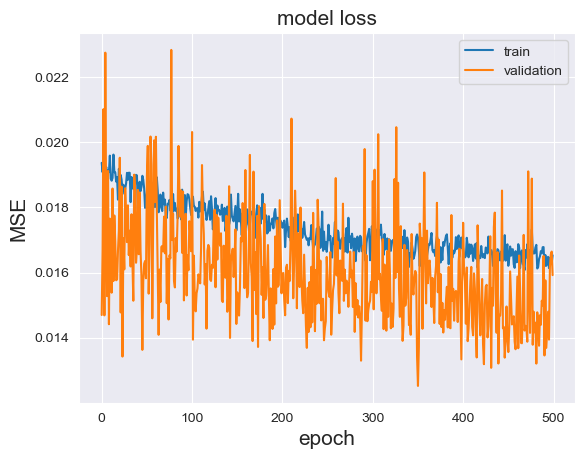

In [26]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('model loss', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend()
plt.savefig('model loss')

(0.0, 1.3)

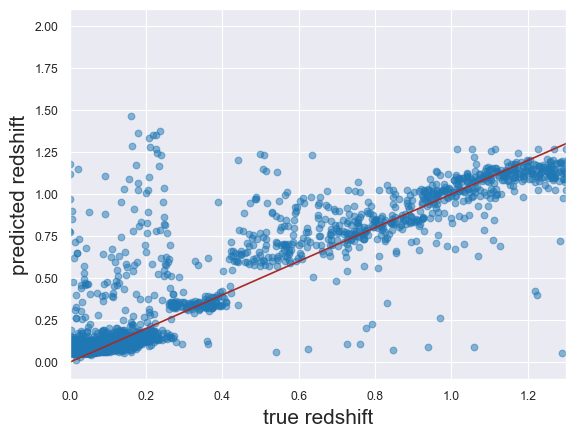

In [37]:
plt.figure()
plt.plot(np.arange(0,3), color = 'brown')
plt.scatter(y_test, y_pred, alpha = 0.5)

plt.xlabel('true redshift', fontsize = 15)
plt.ylabel('predicted redshift', fontsize = 15)
plt.xlim(0, 1.3)

In [28]:
y.shape

(47484,)

In [29]:
y_test.to_numpy().shape

(9497,)

In [30]:
y_pred.shape

(9497,)

C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

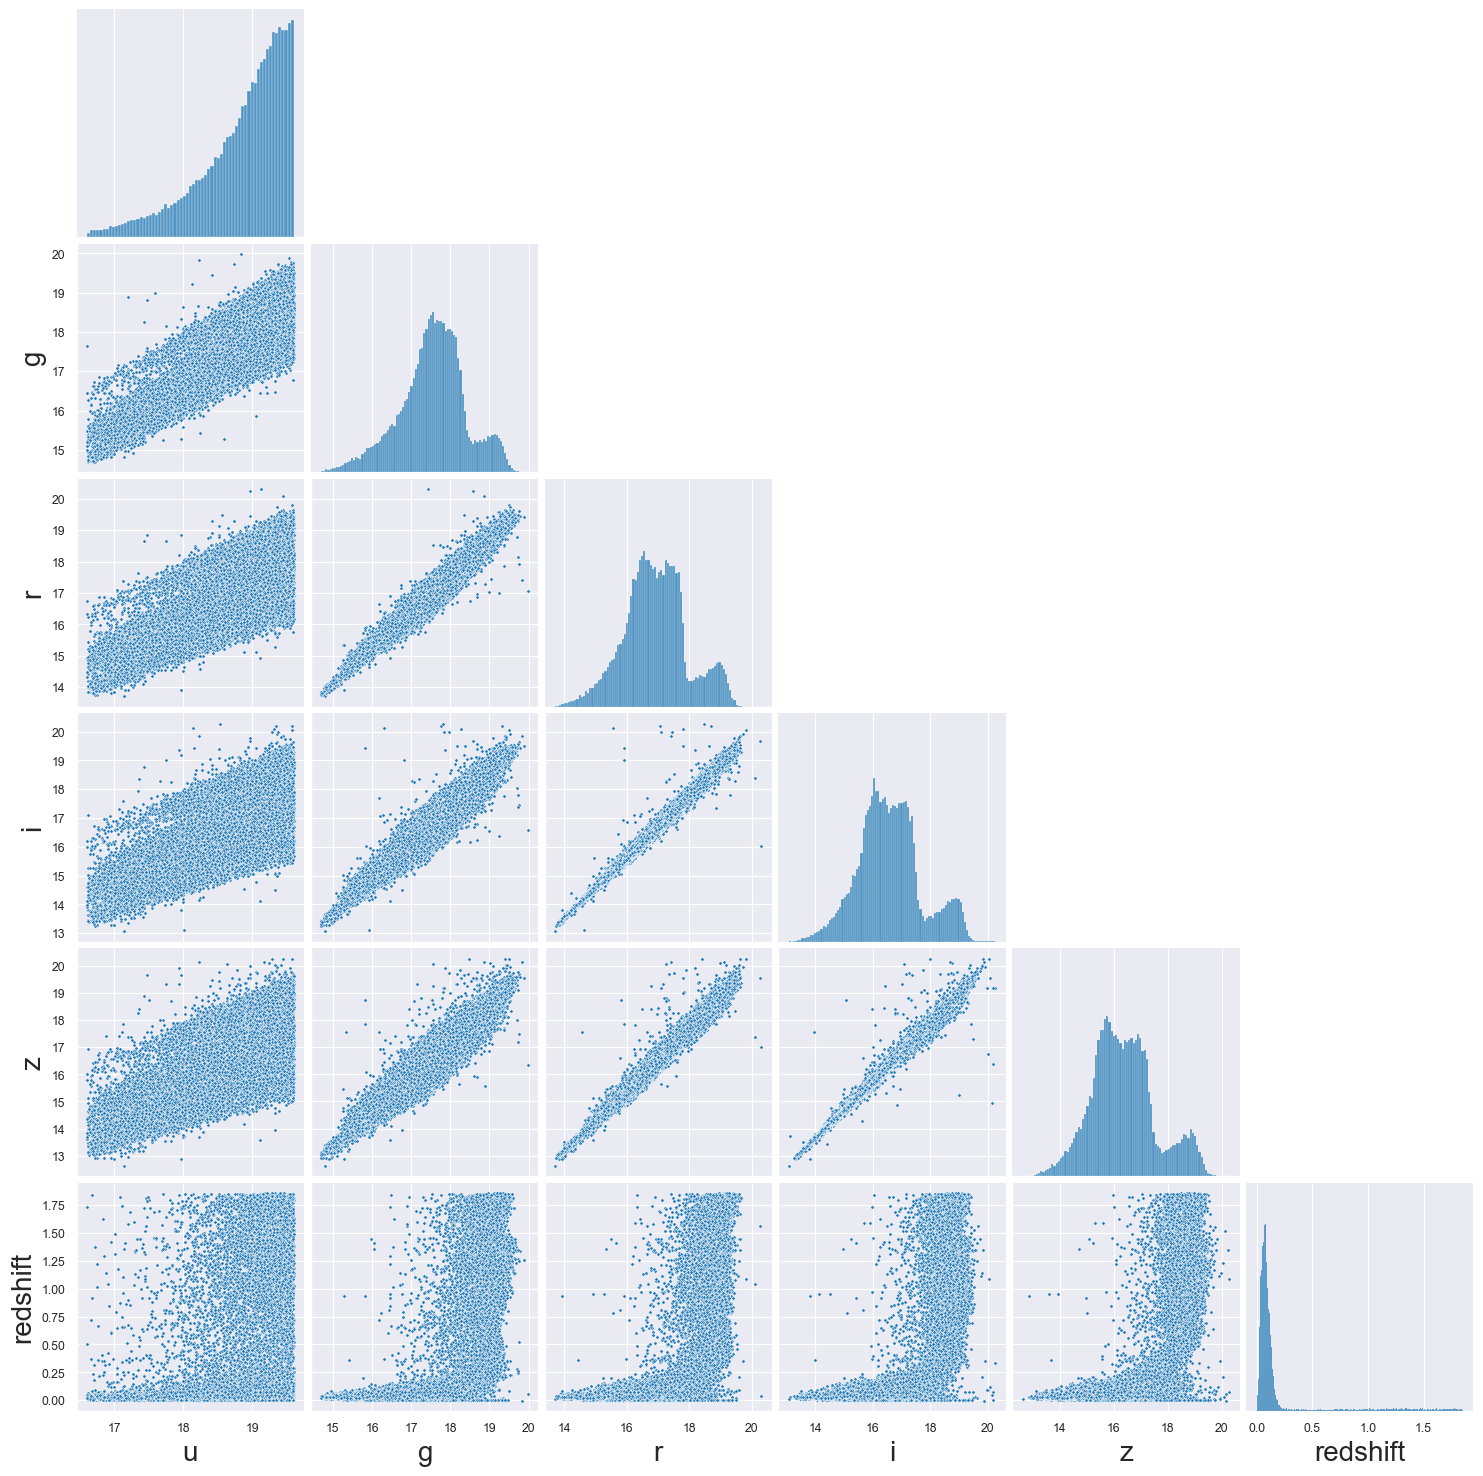

In [38]:
sb.set_context("paper", rc={"axes.labelsize":20})
ax = sb.pairplot(df[['u','g','r','i','z', 'redshift']], corner = True, markers = '.', kind = 'scatter')


In [32]:
df[['u','g','r','i','z']]

,u,g,r,i,z
0,18.27449,17.01069,16.39594,16.05050,15.79158
1,18.51085,17.42787,16.94735,16.61756,16.46231
2,19.59469,19.39359,19.08492,19.01972,19.14087
3,18.86066,17.91374,17.56237,17.26353,17.13068
4,19.46794,18.12656,17.43603,17.04602,16.81404
...,...,...,...,...,...
47479,19.45398,17.71596,16.81220,16.35758,15.97816
47480,17.72143,16.39257,15.74776,15.40971,15.13828
47481,18.33770,17.17221,16.67359,16.32076,16.16934
47482,18.49410,16.54002,15.64546,15.21821,14.89110
